In [40]:
# Install required libraries
!pip install emoji --upgrade --quiet

In [42]:
# Import libraries
import pandas as pd
import re
import emoji
from collections import Counter

In [101]:
# read text from file 
file_location = r"C:\Users\Dell\Documents\ds_ai_whatsapp\_chat.txt"
with open(file_location, 'r', encoding='utf-8') as f:
    data = f.read()

In [102]:
# Create lists to store data
date_list = []
time_list = []
user_list = []
message_list = []

# Iterate through each line in the chat file
for line in data.split('\n'):
    # Use regular expressions to extract date, time, user/number, and message
    match = re.match(r'\[(.*?)\] (.*?):\s*(.*)', line)
    if match:
        date_time = match.group(1).split(', ')
        date_list.append(date_time[0])
        time_list.append(date_time[1])
        user_list.append(match.group(2))
        message_list.append(match.group(3))

In [103]:
# Create a pandas DataFrame from the extracted data
data = {
    'Date': date_list,
    'Time': time_list,
    'User': user_list,
    'Message': message_list
}
df = pd.DataFrame(data)

# Print the resulting DataFrame
df.head()

,Date,Time,User,Message
0,3/18/22,14:29:05,Ds & Ai,‎Messages and calls are end-to-end encrypted. ...
1,3/18/22,14:29:05,~ chris,‎~ chris created this group
2,3/18/22,14:29:05,Ds & Ai,‎You were added
3,9/18/22,22:43:29,EMK Emmanuel,‎‎EMK Emmanuel changed their phone number to a...
4,9/20/22,06:31:52,~ chris,‎‎~ chris changed their phone number to a new ...


In [104]:
df.shape

(3930, 4)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     3930 non-null   object
 1   Time     3930 non-null   object
 2   User     3930 non-null   object
 3   Message  3930 non-null   object
dtypes: object(4)
memory usage: 122.9+ KB


In [106]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_14592\4210372300.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [107]:
# Convert 'Date' and 'Time' to string and merge them
df['DateTime'] = df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time']

# Convert 'DateTime' back to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

# Now you can drop the 'Date' and 'Time' columns if you want
df = df.drop(['Date', 'Time'], axis=1)

df.head()

,User,Message,DateTime
0,Ds & Ai,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05
1,~ chris,‎~ chris created this group,2022-03-18 14:29:05
2,Ds & Ai,‎You were added,2022-03-18 14:29:05
3,EMK Emmanuel,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29
4,~ chris,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52


# SENTIMENT ANALYSIS

In [108]:
# Select relevant column for VADER sentiment analysis
reviews = df['Message']

In [109]:
from nltk.sentiment import SentimentIntensityAnalyzer
# using the VADER pre-trained sentiment analyzer
sia = SentimentIntensityAnalyzer()
# define the get_sentiment_scores function
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores

In [110]:
# apply the get_sentiment_scores function to each review
df['sentiment_scores'] = reviews.apply(get_sentiment_scores)

In [111]:
df.head()

,User,Message,DateTime,sentiment_scores
0,Ds & Ai,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05,"{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'comp..."
1,~ chris,‎~ chris created this group,2022-03-18 14:29:05,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."
2,Ds & Ai,‎You were added,2022-03-18 14:29:05,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,EMK Emmanuel,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
4,~ chris,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."


In [112]:
'''The negative, neutral, and positive scores represent the proportion of the text that falls into each category, 
while the compound score represents an aggregated score that ranges from -1 (most negative) to 1 (most positive) 
and reflects the overall sentiment of the text.'''

# create new columns for each sentiment score
df['vader_neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['vader_neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['vader_pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['vader_compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# drop the original sentiment_scores column
df.drop('sentiment_scores', axis=1, inplace=True)

df.head()

,User,Message,DateTime,vader_neg,vader_neu,vader_pos,vader_compound
0,Ds & Ai,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05,0.099,0.901,0.000,-0.2960
1,~ chris,‎~ chris created this group,2022-03-18 14:29:05,0.000,0.667,0.333,0.2500
2,Ds & Ai,‎You were added,2022-03-18 14:29:05,0.000,1.000,0.000,0.0000
3,EMK Emmanuel,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29,0.000,0.782,0.218,0.2263
4,~ chris,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52,0.000,0.782,0.218,0.2263


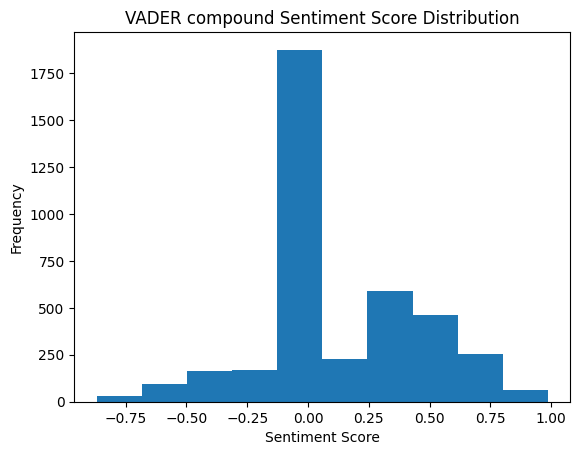

In [113]:
from matplotlib import pyplot as plt
# visual distribution of sentiment scores in a histogram
plt.hist(df["vader_compound"])
plt.title("VADER compound Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [114]:
# categorizing the sentiment as "negative", "neutral", or "positive" based on the value of the score
def map_sentiment(score):
    if score <= -0.05:
        return 'negative'
    elif score >= 0.05:
        return 'positive'
    else:
        return 'neutral'

df['vader_sentiment_category'] = df['vader_compound'].apply(map_sentiment)
df.head()

,User,Message,DateTime,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment_category
0,Ds & Ai,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05,0.099,0.901,0.000,-0.2960,negative
1,~ chris,‎~ chris created this group,2022-03-18 14:29:05,0.000,0.667,0.333,0.2500,positive
2,Ds & Ai,‎You were added,2022-03-18 14:29:05,0.000,1.000,0.000,0.0000,neutral
3,EMK Emmanuel,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29,0.000,0.782,0.218,0.2263,positive
4,~ chris,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52,0.000,0.782,0.218,0.2263,positive


C:\Users\Dell\AppData\Local\Temp\ipykernel_14592\733312182.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='vader_sentiment_category', kind='count', data=df, palette="muted")


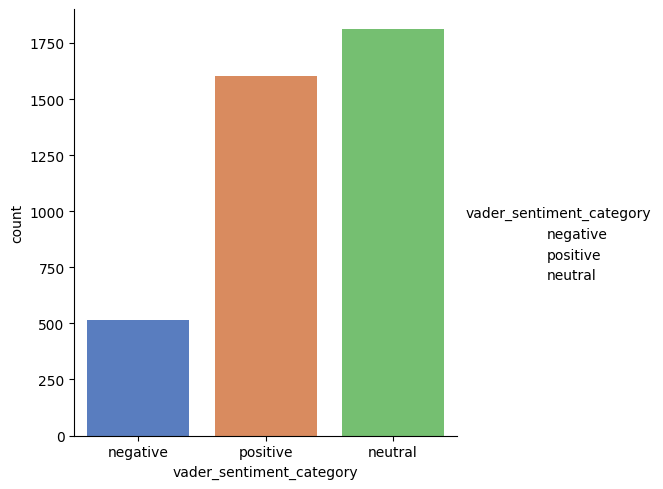

In [115]:
'''to get a clearer picture of the customer sentiment, they are grouped
according to their sentiment score. They are in 3 distinct groups of
positive, neutral and negative. The catplot below is a graphical
representation of the result.'''

import seaborn as sns
from seaborn import catplot
sns.catplot(x='vader_sentiment_category', kind='count', data=df, palette="muted")

In [116]:
# Slice the last 7 characters from the 'User' column to protect user privacy
df['User'] = df['User'].str.slice(-7)

In [117]:
df.head(10)

,User,Message,DateTime,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment_category
0,Ds & Ai,‎Messages and calls are end-to-end encrypted. ...,2022-03-18 14:29:05,0.099,0.901,0.000,-0.2960,negative
1,~ chris,‎~ chris created this group,2022-03-18 14:29:05,0.000,0.667,0.333,0.2500,positive
2,Ds & Ai,‎You were added,2022-03-18 14:29:05,0.000,1.000,0.000,0.0000,neutral
3,mmanuel,‎‎EMK Emmanuel changed their phone number to a...,2022-09-18 22:43:29,0.000,0.782,0.218,0.2263,positive
4,~ chris,‎‎~ chris changed their phone number to a new ...,2022-09-20 06:31:52,0.000,0.782,0.218,0.2263,positive
5,2 5492‬,‎Angie UoS added ‪+234 813 132 5492‬,2022-09-20 12:03:48,0.000,1.000,0.000,0.0000,neutral
6,Vincent,Hello Good morning guys,2022-09-26 06:44:46,0.000,0.508,0.492,0.4404,positive
7,Vincent,First day in class,2022-09-26 06:44:53,0.000,1.000,0.000,0.0000,neutral
8,Vincent,Let's know how it went,2022-09-26 06:45:20,0.000,1.000,0.000,0.0000,neutral
9,Vincent,We joining y'all soon,2022-09-26 06:45:28,0.000,1.000,0.000,0.0000,neutral
